<a href="https://colab.research.google.com/github/sneha0342/sneha0342/blob/data-science/sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sales Prediction Using Python**



Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler


importing dataset

In [ ]:
df = pd.read_csv("/content/advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.describe()


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
# Check for missing value
print(df.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [ ]:
# Check for duplicated rows
print(df.duplicated().sum())

0


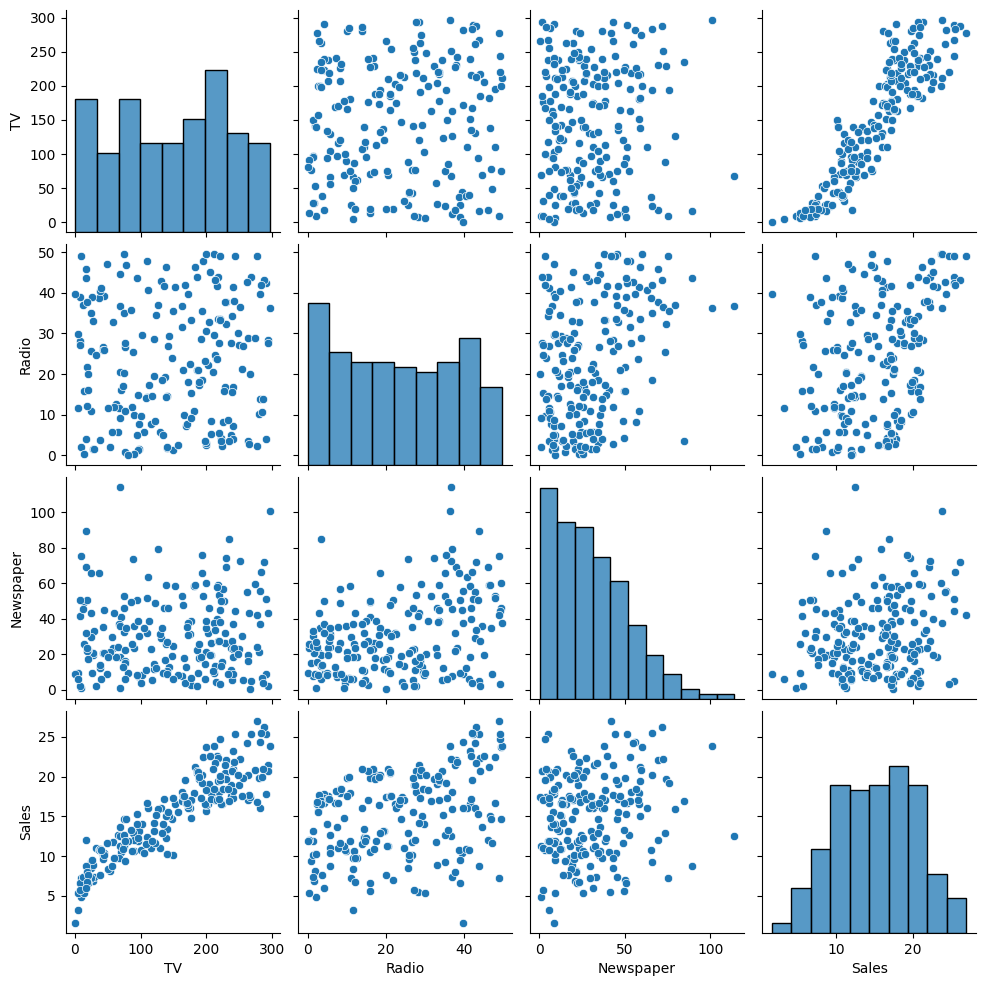

In [ ]:
# Pairplot to visualize relationships
sns.pairplot(df)
plt.show()

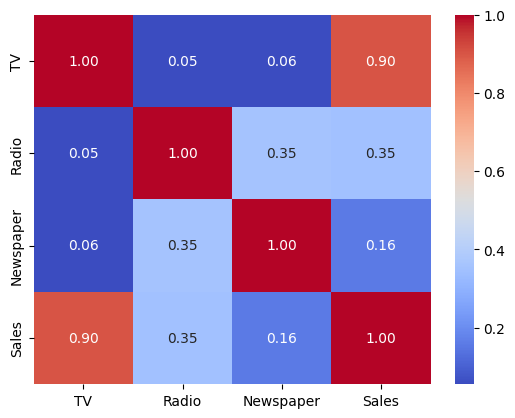

In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

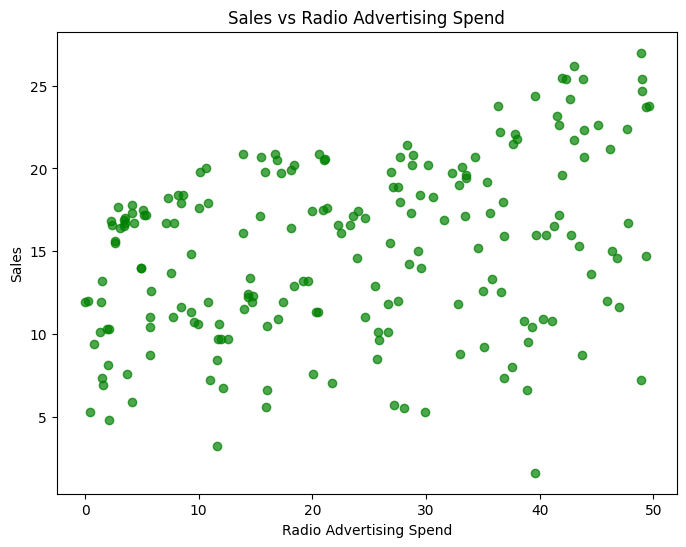

In [ ]:
# @title Sales vs Radio Advertising Spend

plt.figure(figsize=(8, 6))
plt.scatter(df['Radio'], df['Sales'], alpha=0.7, color='green')
plt.title('Sales vs Radio Advertising Spend')
plt.xlabel('Radio Advertising Spend')
_ = plt.ylabel('Sales')

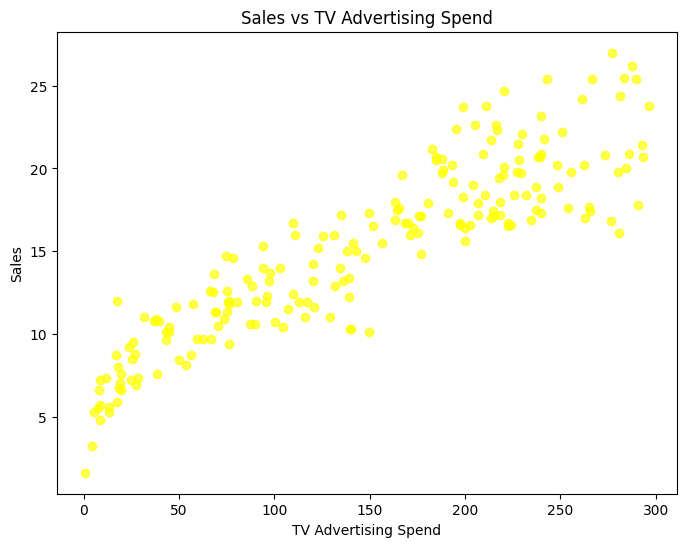

In [ ]:
# @title Sales vs TV Advertising Spend

plt.figure(figsize=(8, 6))
plt.scatter(df['TV'], df['Sales'], alpha=0.7, color='yellow')
plt.title('Sales vs TV Advertising Spend')
plt.xlabel('TV Advertising Spend')
_ = plt.ylabel('Sales')

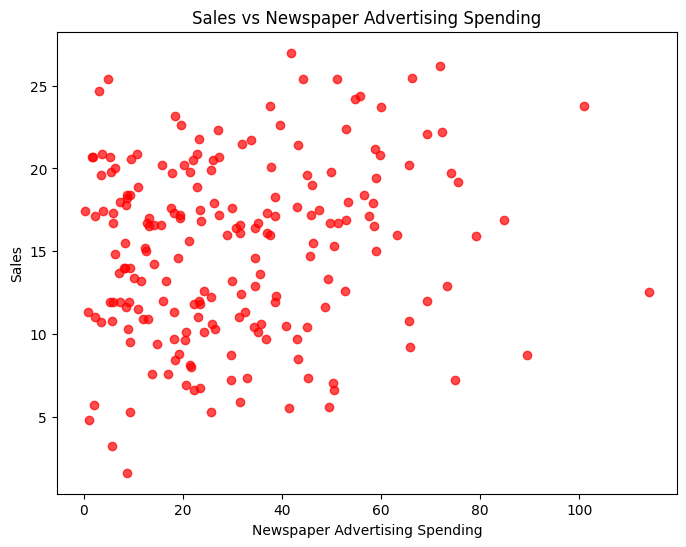

In [ ]:
# @title Sales vs Newspaper Advertising Spending

plt.figure(figsize=(8, 6))
plt.scatter(df['Newspaper'], df['Sales'], alpha=0.7, color='red')
plt.title('Sales vs Newspaper Advertising Spending')
plt.xlabel('Newspaper Advertising Spending')
_ = plt.ylabel('Sales')

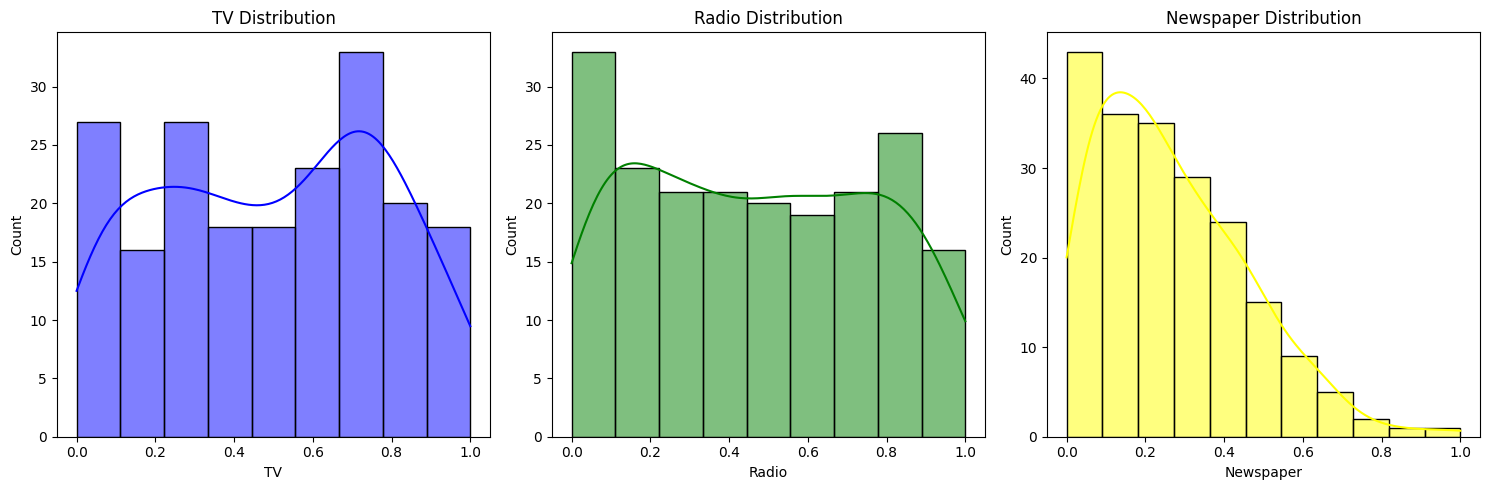

In [ ]:
#Histplot
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['TV'], kde=True, color='blue')
plt.title('TV Distribution')
plt.subplot(1, 3, 2)
sns.histplot(df['Radio'], kde=True, color='green')
plt.title('Radio Distribution')
plt.subplot(1, 3, 3)
sns.histplot(df['Newspaper'], kde=True, color='yellow')
plt.title('Newspaper Distribution')
plt.tight_layout()
plt.show()

**MODEL TRANING**

In [ ]:
#scaling of features
features = ['TV', 'Radio', 'Newspaper']
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])
df.head()

,TV,Radio,Newspaper,Sales
0,0.775786,0.762097,0.605981,22.1
1,0.148123,0.792339,0.394019,10.4
2,0.055800,0.925403,0.606860,12.0
3,0.509976,0.832661,0.511873,16.5
4,0.609063,0.217742,0.510994,17.9


In [ ]:
#Split the dataset
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR()
}

results = {}

#train and evaluate model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MSE': mse, 'R-squared': r2}

results_df = pd.DataFrame(results).T

print(results_df)

                                MSE  R-squared
Linear Regression          2.907757   0.905901
Ridge Regression           3.094442   0.899860
Lasso Regression          20.710157   0.329792
ElasticNet Regression     27.566398   0.107915
Decision Tree              2.720750   0.911953
Random Forest              1.331253   0.956919
Gradient Boosting          1.241598   0.959820
Support Vector Regressor   3.470141   0.887702


Gradient Boosting has the lowest MSE and a high R-squared, making it likely the best model among those tested.


Visualize the results on the model

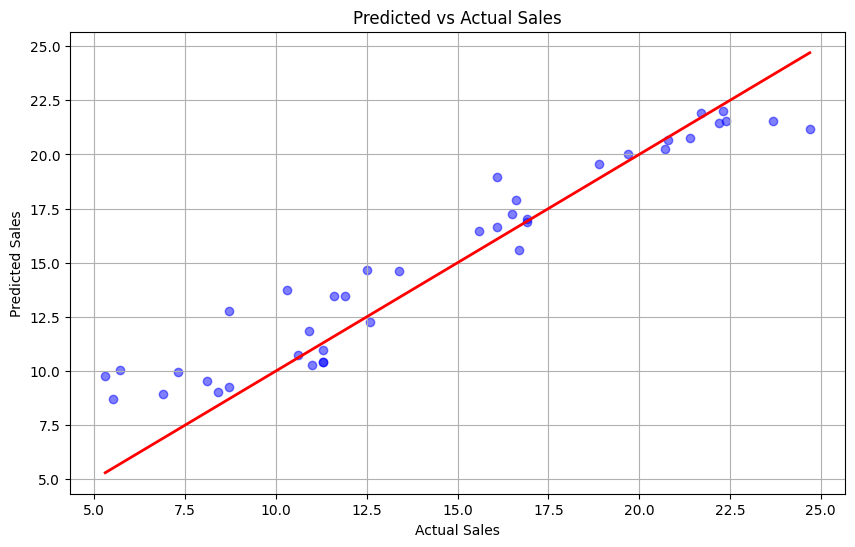

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Line for perfect prediction
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Predicted vs Actual Sales')
plt.grid(True)
plt.show()